<a href="https://colab.research.google.com/github/othoni-hub/ECG2/blob/main/Ch09_TD_Ex7_UrnePolya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CPGE-ECG2** 
<img src="https://drive.google.com/uc?id=12Wo3LubGGT4qOvYFAuLP4CyCuwjKNVuk" width="230" height="150" align = "right"/>

## **Ch09 - Notebook : Graphes probabilistes - Chaînes de Markov**
## **Exercices du TD : Ex n°7 : Urne de Polya**




**O.Thöni - Lycée Saint-Charles Sainte Croix - LE MANS**

## **Exercice 7 : Urne de Polya**

<img src="https://www.gants-blancs.com/42-large_default/boules-de-vote.jpg" width="230" height="220" align = "center"/>

Une urne contient n boules noires et b boules blanches. 
On effectue une suite de tirages dans cette urne de la façon suivante : à chaque tirage, on tire une boule avec équiprobabilité, on regarde sa couleur, on la remet dans l'urne et on y rajoute $c$ boules de la même couleur. On note $N_k$ (resp.$B_k$) le nombre de boules noires (resp. blanches) dans l'urne après $k$ tirages, et $X_k$, la proportion de boules blanches après ces $k$ tirages.

**Modélisation informatique**



In [1]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt

In [2]:
# initialisations
N = 100 # nombre de tirages par expérience
e = 20  # nombre d'expériences

b0 = 1  # nombre initial de boules blanches
n0 = 1  # nombre initial de boules noires
c = 1   # ajout après chaque tirage

n = n0  
b = b0  

p = b / (n+b)

B = [p] # liste des proportions de boules blanches au fil des N tirages

proportions = []

In [3]:
# palette de couleurs
colors = plt.cm.jet(np.linspace(0,1,e))
#x = np.linspace(0, 2*np.pi, 64)
#y = np.cos(x) 

#for i in range(e):
#   plt.plot(x, i*y, color=colors[i])

In [4]:
def tirage(b,n,c = 1) : 
    '''Reçoit en entrées le nombre de boules blanches, de boules noires, et le nombre de boules ajoutées (1 par défaut)
    et retourne le nouveau nombre de boules blanches, noires, et la proportion de blanches'''
    p = b / (n+b)           # probabilité de tirer une boule blanche = proportion de blanches dans l'urne
    if rd.random() < p :    # tirage blanc
        b = b+c             # on augmente le nombre de blanches de c boules
    else :
        n = n+c             # on augmente le nombre de noires de c boules
    p = b / (n+b)           # on recalcule la proportion de boules blanches
    return b,n,p


In [5]:
def experience(N):
    global B,b,n

    for k in range(1,N+1):
        b,n,p = tirage(b,n)
        B = B + [p]
    
    k = range(N+1)
    #plt.plot(k,B)

In [6]:
def e_experiences(b0,n0, e, graphique = True):
    global B,b,n, proportions

    k = range(N+1)
    for i in range(e) :
        n = n0  
        b = b0  

        p = b / (n+b)
        
        B = [p]
        experience(N)
        #print(B)
        
        if graphique :
            plt.plot(k,B, color = colors[i] , linewidth = 0.8)
        else :
            proportions = proportions + [B[-1]]
       


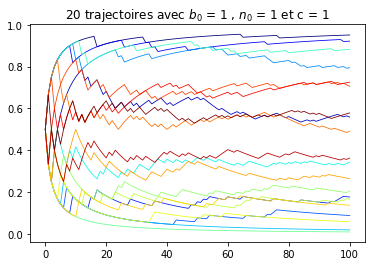

In [7]:
e_experiences(b0,n0, e)

plt.title(str(e) + " trajectoires avec $b_0$ = "+str(b0) + " , $n_0$ = " + str(n0) + " et c = "+str(c))
plt.show()

On s'aperçoit que les expériences donnent des évolutions très différentes les unes des autres, mais que chacune de ces trajectoires sembe se stabiliser. De plus, la répartition des proportions finales de blanches semble à peu près uniformément répartie.

**Preuve de la répartition uniforme des proportions finales** dans le cas où $b = n = c = 1$



Montrons par récurrence que, quel que soit n, $B_n$ suit une loi uniforme sur $\left \{1,2,...n+1\right \}$

* **initialisation**

$[B_1=1]$ : on a tiré une noire au 1er tirage.

$[B_1=2]$ : on a tiré une blanche au 1er tirage.

donc $P \left ( [B_1 = 1] \right ) = P \left ( [B_1 = 2] \right ) = \frac{1}{2}$

donc $B_1 \rightharpoonup U_{\{1,2\}}$

* **hérédité**

Soit un entier k quelconque tel que (hypothèse de récurrence forte)
$\forall  j \in \{1,2,...k+1\}, P \left ( [B_k = j] \right ) = \frac{1}{n+1}$

Alors, les $\left ( [B_k = j] \right )_{j \in \{1,2,...k+1\}}$ forment un système complet, et ona, par la formule des probabilités totales : 

$$\forall  i \in \{1,2,...n+2\}, P \left ( [B_{k+1} = i] \right ) =  \sum_{j=1}^{n+1} P_{[B_{k} = j]} \left ( [B_{k+1} = i] \right ) \times P\left ( [B_k = j] \right )$$

Mais dans cette somme, seuls deux termes sont non nuls :    
* on avait déjà $i$ boules blanches et on a tiré une boule noire,
* ou bien, on avait $i-1$ boules blanches et on a tiré une boule blanche

Ainsi, $P \left ( [B_{k+1} = i] \right ) =   \frac{1}{k+1} \times \left ( P_{[B_{k} = i]} \left ( [B_{k+1} = i] \right ) + P_{[B_{k} = i-1]} \left ( [B_{k+1} = i] \right ) \right ) = \frac{1}{k+1} \times \left (\frac{k+2-i}{k+2} - \frac{i}{k+2} \right ) = \frac{1}{k+2}$ (ce que l'on voulait)

Donc $\forall n \in \mathbb{N}^* , B_n \rightharpoonup U_{\{1,2,...,n+1\}}$

C'est pourquoi, après le n-ième tirage, toutes les configurations sont équiprobables. Donc si on renouvelle cette expérience de n tirages plusieurs fois, on aura des compositions finales de l'urne très différentes, uniformément répartis sur $[[1,n+1]]$.

* **Illustration graphique**

On reprend à l'identique le code ci-dessus, sans graphique, mais en ajoutant un stockage des proportions de blanches obtenues dans chaque situation finale.

Puis, on réalise un histogramme des proportions obtenues.

### **Cas $n_0 = 1$, $b_0 = 1$ et $c = 1$**

In [8]:
# initialisations
N = 500 # nombre de tirages par expérience
e = 5000  # nombre d'expériences

b0 = 1  # nombre initial de boules blanches
n0 = 1  # nombre initial de boules noires
c = 1   # ajout après chaque tirage

n = n0  
b = b0  

p = b / (n+b)

B = [p] # liste des proportions de boules blanches au fil des N tirages

proportions = []

In [9]:
e_experiences(b,n,e, False)

Urne de Polya, répartition des proportions finales de boules blanches sur 5000 expériences, avec initialement : boules noires : 1, boules blanches : 1, ajout 1


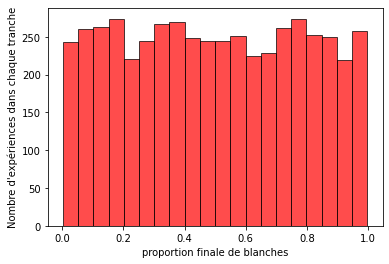

In [10]:
plt.hist(proportions, 20, color = 'red', alpha = 0.7, edgecolor = 'black')
print("Urne de Polya, répartition des proportions finales de boules blanches sur "+str(e) + " expériences, avec initialement : boules noires : " + str(n0)+", boules blanches : "+str(b0)+", ajout "+str(c) )
plt.ylabel("Nombre d'expériences dans chaque tranche")
plt.xlabel("proportion finale de blanches")
plt.show()

### **Cas $n_0 = 2$, $b_0 = 2$ et $c = 1$**

In [11]:
# initialisations
N = 500 # nombre de tirages par expérience
e = 5000  # nombre d'expériences

b0 = 2  # nombre initial de boules blanches
n0 = 2  # nombre initial de boules noires
c = 1   # ajout après chaque tirage

n = n0  
b = b0  

p = b / (n+b)

B = [p] # liste des proportions de boules blanches au fil des N tirages

proportions = []

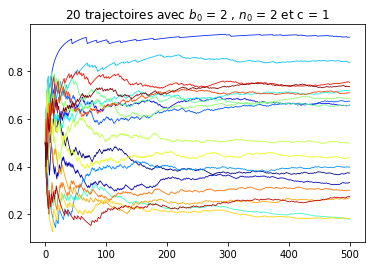

In [12]:
e_experiences(b0,n0, 20)

plt.title(str(20) + " trajectoires avec $b_0$ = "+str(b0) + " , $n_0$ = " + str(n0) + " et c = "+str(c))
plt.show()

In [13]:
e_experiences(b,n,e, False)

Urne de Polya, répartition des proportions finales de boules blanches sur 5000 expériences, avec initialement : boules noires : 2, boules blanches : 2, ajout 1


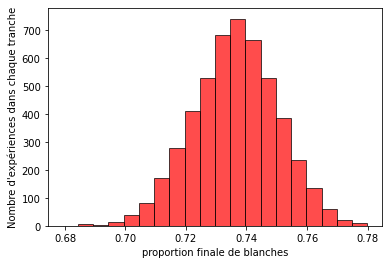

In [14]:
plt.hist(proportions, 20, color = 'red', alpha = 0.7, edgecolor = 'black')
print("Urne de Polya, répartition des proportions finales de boules blanches sur "+str(e) + " expériences, avec initialement : boules noires : " + str(n0)+", boules blanches : "+str(b0)+", ajout "+str(c) )
plt.ylabel("Nombre d'expériences dans chaque tranche")
plt.xlabel("proportion finale de blanches")
plt.show()

Lorsque $n_0 = 2$, $b_0 = 2$ et $c = 1$, la répartition finale des boules blanches est en forme de parabole concave, le maximum étant atteint pour une répartition équilibrée des boules blanches et noires.

### **Cas $n_0 = 2$, $b_0 = 1$ et $c = 1$**

In [15]:
# initialisations
N = 500 # nombre de tirages par expérience
e = 5000  # nombre d'expériences

b0 = 1  # nombre initial de boules blanches
n0 = 2  # nombre initial de boules noires
c = 1   # ajout après chaque tirage

n = n0  
b = b0  

p = b / (n+b)

B = [p] # liste des proportions de boules blanches au fil des N tirages

proportions = []

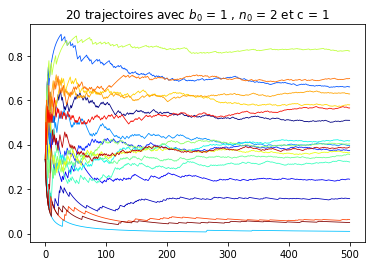

In [16]:
e_experiences(b0,n0, 20)

plt.title(str(20) + " trajectoires avec $b_0$ = "+str(b0) + " , $n_0$ = " + str(n0) + " et c = "+str(c))
plt.show()

In [17]:
e_experiences(b0,n0,e, False)

Urne de Polya, répartition des proportions finales de boules blanches sur 5000 expériences, avec initialement : boules noires : 2, boules blanches : 1, ajout 1


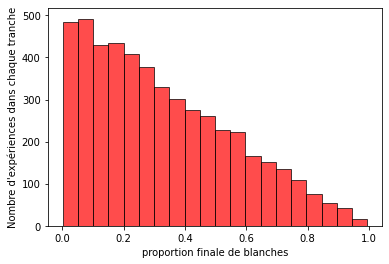

In [18]:
plt.hist(proportions, 20, color = 'red', alpha = 0.7, edgecolor = 'black')
print("Urne de Polya, répartition des proportions finales de boules blanches sur "+str(e) + " expériences, avec initialement : boules noires : " + str(n0)+", boules blanches : "+str(b0)+", ajout "+str(c) )
plt.ylabel("Nombre d'expériences dans chaque tranche")
plt.xlabel("proportion finale de blanches")
plt.show()

Lorsque $n_0 = 2$, $b_0 = 2$ et $c = 1$, la répartition finale des boules blanches est cette fois une fonction affine !